# Que patrones que determinan si un juego tiene éxito o no?

Este proyecto esta relacionado con los datos de la tienda online Ice que vende videojuegos por todo el mundo (contiene las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos.

**Objetivo:**  identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.

**Etapas del analisis:**


## Inialización.


In [1]:
# Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind


## Lectura general de los datos

In [2]:
# Lectura de los datos
df_ice = pd.read_csv('/datasets/games.csv')

# Informacion general
df_ice.info()

# Las 10 primeras filas del DataFrame
df_ice.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Preparación de los datos

In [3]:
# Importamos las librerias y leemos los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cambiamos los nombres de las columnas a minisculas.
df_ice.columns = df_ice.columns.str.lower()


# Pasar de float a 'int' laS columnaS 'user_score' y 'year_of_release'.
df_ice['user_score'] = pd.to_numeric(df_ice['user_score'],
                                        downcast='integer',
                                        errors='coerce')

df_ice['year_of_release'] = pd.to_numeric(df_ice['year_of_release'],
                                        downcast='integer',
                                        errors='coerce')

#Verificacion de valores ausentes
df_ice.isna().sum()

# Rellenar valores ausentes
df_ice['user_score'] = df_ice['user_score'].fillna(df_ice['user_score'].median())
df_ice['critic_score'] = df_ice['critic_score'].fillna(df_ice['critic_score'].median())
df_ice['year_of_release'] = df_ice['year_of_release'].fillna(0).astype(int)

# Eliminamos filas con 'year_of_release' igual a 0 ya que son datos insuficientes
df_ice = df_ice[df_ice['year_of_release'] != 0]

#Verificacion de valores ausentes
df_ice.isna().sum()

# Calcular las ventas totales para cada juego y se agg a una nueva columna 'total_sales'.
df_ice['total_sales'] = (df_ice['jp_sales'] + df_ice['na_sales'] + df_ice['eu_sales'] + df_ice['other_sales'])

df_ice.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,31.38


**Conclusion:**

- Se realiza el cambio de mayusculas a minusculas en el nombre de la columnas.
- Se evidencia 5 columnas con datos ausentes, las columnas 'critic_score', 'user_score', 'rating' cuentan con 8578, 6701, 6766 valores ausentes respectivamente.
- Las columnas 'critic_score', 'user_score' se rellenarón los valores NaN con la media, debido a que el analisis no esta tan enfocado a la calificación, por lo tanto no va a interferir (dañar) con los resultados.
- Se eliminan los valores NaN de la columna 'year_of_release' porque son pocos y no tienen relevancia.
 - Agregamos una nueva columna 'total_sales', al dataset con el total de ventas.

## Analisis de los datos

<AxesSubplot:title={'center':'Cantidad de juegos Lanzados en cada año'}, xlabel='Year', ylabel='Numero de juegos'>

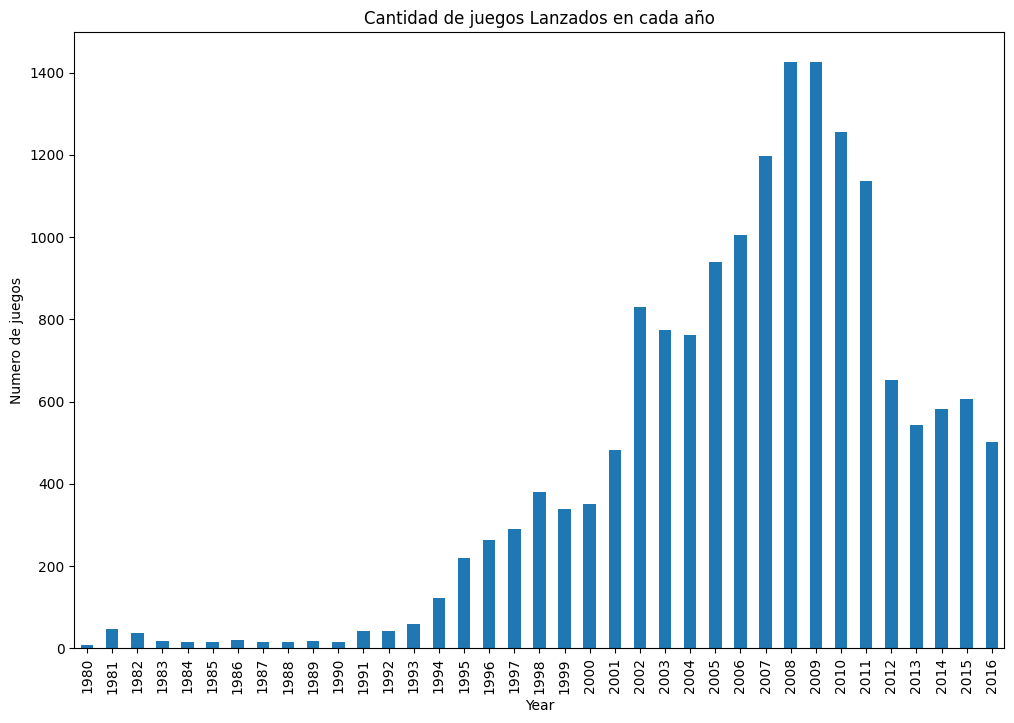

In [4]:
# Calcular la cantidad de juegos lanzados por año y lo representamos en un grafico de barras
agrupado_año = df_ice.groupby('year_of_release')['name'].count()
agrupado_año.plot(kind='bar', title= 'Cantidad de juegos Lanzados en cada año', xlabel='Year', ylabel='Numero de juegos', figsize=(12,8))




**Conclusiones del grafico**

- Desde el año 1994 hasta el 2005, los juegos lanzados fueron aumentado periodicamente cada año, pasar de 121 a 939 al año.
- los años 2008 y 2009 fueron los dos años con mas juegos lanzados, 1427 y 1426 respectivamente.
- Desde el año 2012 hasta el 2016 la cantidad de juegos lanzados por año se mantuvieron entre 653 y 502.
 

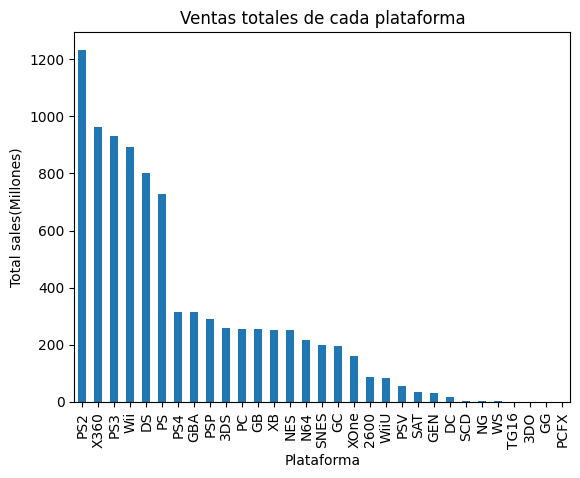

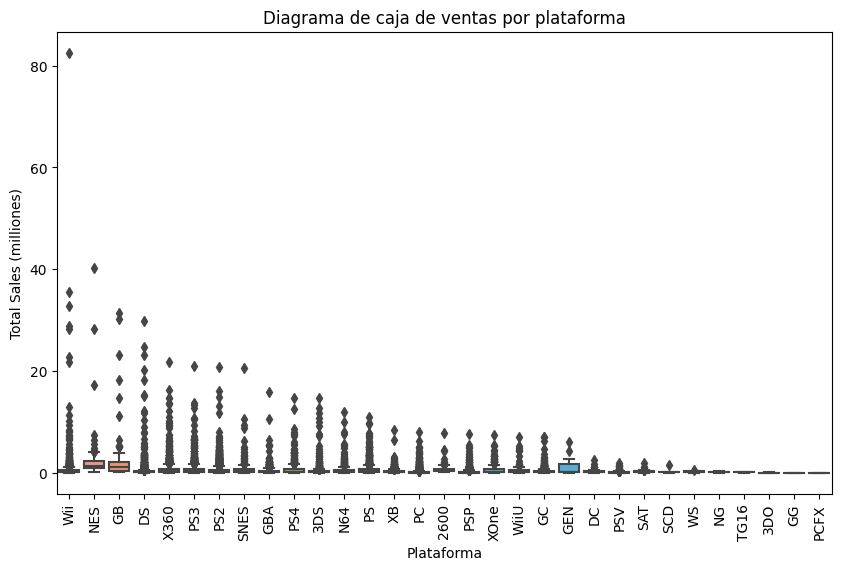

<AxesSubplot:title={'center':'Las 10 plataformas con mas ventas'}, xlabel='year_of_release'>

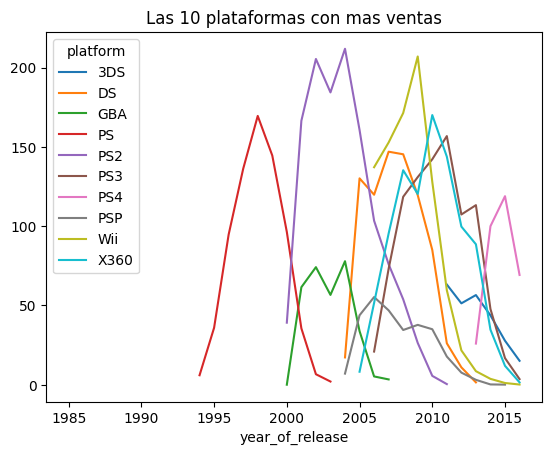

In [5]:
# Total de ventas para cada plataforma.
total_ventas_platform = df_ice.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
total_ventas_platform.plot(kind='bar', title='Ventas totales de cada plataforma', xlabel='Plataforma', ylabel='Total sales(Millones)')

# Diagrama de caja de las ventas por cada plataforma
plt.figure(figsize=(10,6))
sns.boxplot(data=df_ice, x='platform', y='total_sales')
plt.title('Diagrama de caja de ventas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Total Sales (milliones)')
plt.xticks(rotation=90)
plt.show()

# Top 10 del total de ventas para cada plataforma y creamos un grafico para representarlas
ventas_por_plataforma_y_year = df_ice.groupby(['platform', 'year_of_release'])['total_sales'].sum()
df = pd.DataFrame(ventas_por_plataforma_y_year).reset_index()
top_10_plataformas= ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']
grafico = df[df['platform'] .isin(top_10_plataformas)]

grafico.pivot_table(index='year_of_release', columns='platform', values='total_sales').plot(title='Las 10 plataformas con mas ventas')


# Distribución de ventas por año para las plataformas


<AxesSubplot:title={'center':'Las ventas de cada plataformas en los ultimos 5 años'}, xlabel='year_of_release'>

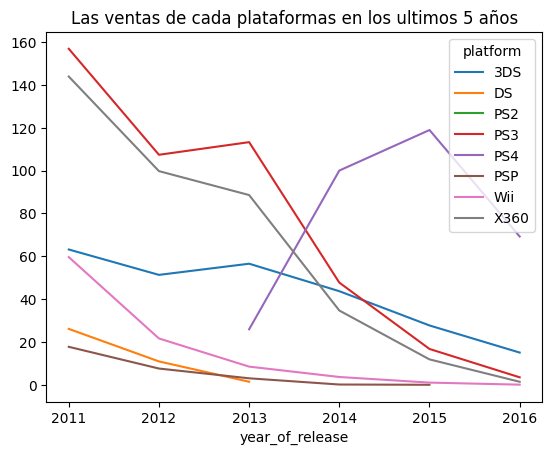

<AxesSubplot:title={'center':'Las ventas de cada plataformas en los ultimos 5 años'}, xlabel='year_of_release'>

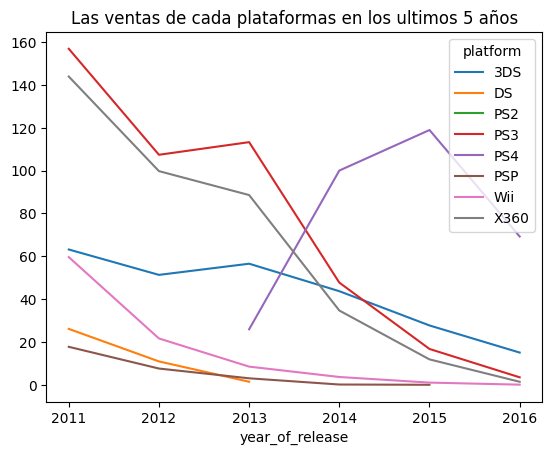

In [6]:
# Grafico para las Plataformas principales con mas ventas en los ultimos 5 años 
plat_ultimos_year= [2011, 2012, 2013, 2014, 2015, 2016]
filt_df= grafico[grafico['year_of_release'] .isin(plat_ultimos_year)]
filt_df.pivot_table(index='year_of_release', columns='platform', values='total_sales').plot(title='Las ventas de cada plataformas en los ultimos 5 años')


**Las plataformas con mas ventas**

Conclusiones:
- Las 6 plataformas con mas ventas fueron:
      PS2     1255.77
      X360     971.42
      PS3      939.65
      Wii      907.51
      DS       806.12
      PS       730.86
  estas 6 plataformas desde el año de lanzamiento hasta desaparecer, es un promedio de 10 años.
  


**En los ultimos 5 años**

- la plataforma PS4 es la plataforma principal que mas ha vendido en los ultimos 3 años.

<AxesSubplot:title={'center':'Total de ventas para cada genero'}, xlabel='Género', ylabel='Total ventas(Millones)'>

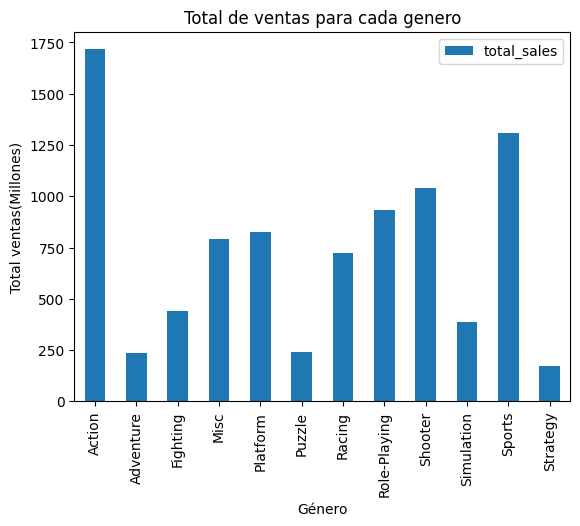

In [7]:
# Generos mas rentables 
oki= df_ice.groupby('genre')['total_sales'].sum()
total_ventas_genero = pd.DataFrame(oki).reset_index()
total_ventas_genero.plot(kind='bar', x='genre', y='total_sales', title= 'Total de ventas para cada genero', xlabel='Género', ylabel='Total ventas(Millones)')


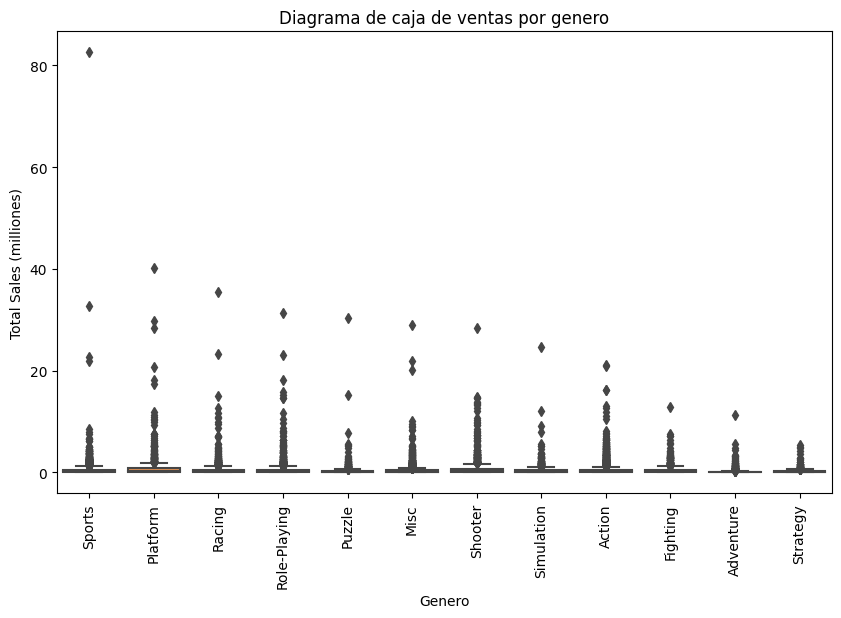

              critic_score  user_score
critic_score      1.000000    0.477575
user_score        0.477575    1.000000


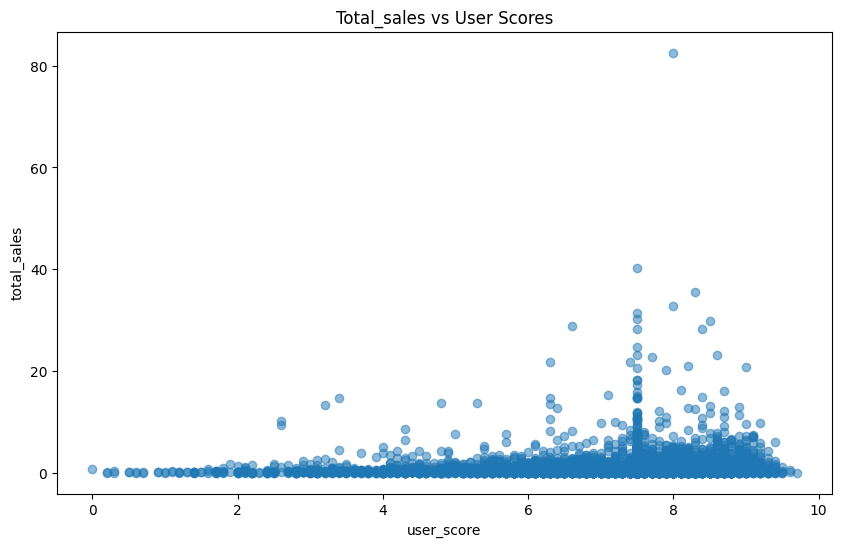

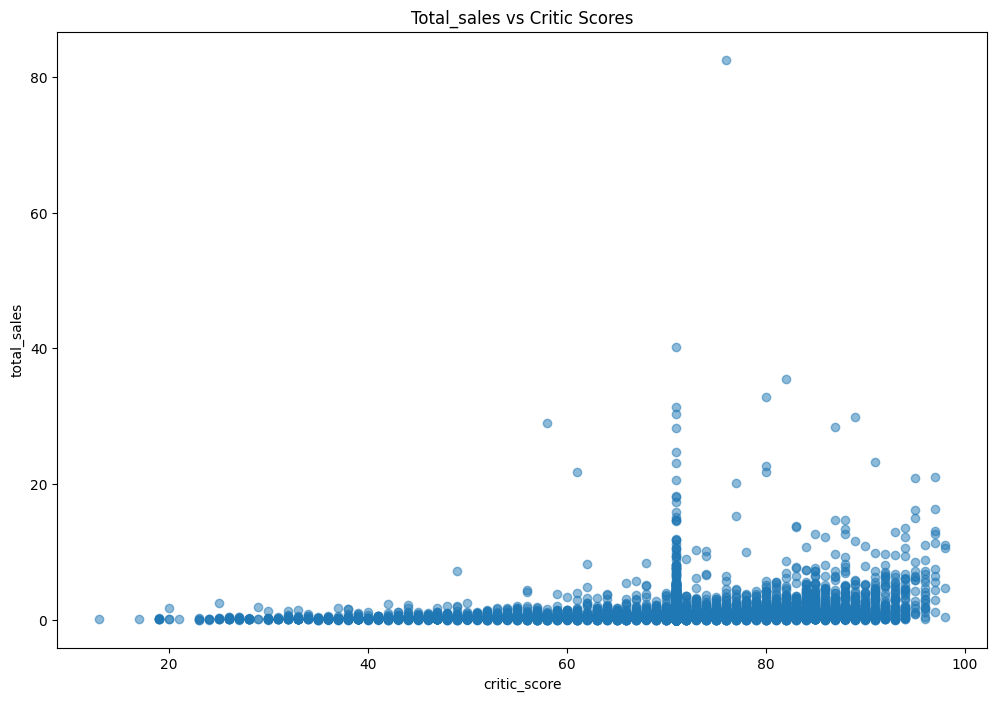

In [8]:
# Top 5 de los generos mas vendidos
top5_genero = total_ventas_genero.sort_values(ascending=False, by='total_sales').reset_index().head(5)
top5_genero

# Diagrama de las ventas por genero
plt.figure(figsize=(10,6))
sns.boxplot(data=df_ice, x='genre', y='total_sales')
plt.title('Diagrama de caja de ventas por genero')
plt.xlabel('Genero')
plt.ylabel('Total Sales (milliones)')
plt.xticks(rotation=90)
plt.show()

# Correlation calculation
corr_matrix = df_ice[['critic_score', 'user_score']].corr()
print(corr_matrix)

# Grafico para user_score en relación con las ventas.
plt.figure(figsize=(10, 6))
plt.scatter(df_ice['user_score'], df_ice['total_sales'], alpha=0.5)
plt.title('Total_sales vs User Scores')
plt.xlabel('user_score')
plt.ylabel('total_sales')
plt.show()

# Grafico para critic_score en relación con el total ventas.
plt.figure(figsize=(12, 8))
plt.scatter(df_ice['critic_score'], df_ice['total_sales'], alpha=0.5)
plt.title('Total_sales vs Critic Scores')
plt.xlabel('critic_score')
plt.ylabel('total_sales')
plt.show()

## Crea un perfil de usuario para cada región

In [9]:
# Función.
def top5_plataformas_regiones(region_sales):
    top_plataformas = df_ice.groupby('platform')[region_sales].sum().sort_values(ascending=False).head(5)
    top_regiones = df_ice.groupby('genre')[region_sales].sum().sort_values(ascending=False).head(5)
    return top_plataformas, top_regiones

# Region NA
plataformas_na, generos_na = top5_plataformas_regiones('na_sales')

# Region EU
plataformas_eu, generos_eu = top5_plataformas_regiones('eu_sales')

#Region JP
plataformas_jp, generos_jp = top5_plataformas_regiones('jp_sales')

# Resultados
print("\033[1mNorte America\033[0m")
print("Las 5 plataformas principales son:", plataformas_na)
print("Los 5 generos principales son:", generos_na)
print()
print()
print("\033[1mEuropa\033[0m")
print("Las 5 plataformas principales son:", plataformas_eu)
print("Los 5 generos principales son:", generos_eu)
print()
print()
print("\033[1mJapón\033[0m")
print("Las 5 plataformas principales son:", plataformas_jp)
print("Los 5 generos principales son:", generos_jp)

Norte America
Las 5 plataformas principales son: platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64
Los 5 generos principales son: genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64


Europa
Las 5 plataformas principales son: platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64
Los 5 generos principales son: genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64


Japón
Las 5 plataformas principales son: platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64
Los 5 generos principales son: genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


In [10]:
# los 5 juegos mas vendidos de la plataforma 'PS2'
top5_juegos_ps2 = df_ice[df_ice['platform']== 'PS2']
print(top5_juegos_ps2.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5))

# calificación promedio del usuario para el juego mas vendido a nivel global
top5_juegos_ps2[top5_juegos_ps2['name'] == 'Grand Theft Auto: San Andreas']['user_score'].mean()

# los 5 juegos mas vendidos de la plataforma 'X360'
plataforma_x360 = df_ice[df_ice['platform']== 'X360']
plataforma_x360.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5)

name
Grand Theft Auto: San Andreas    20.81
Grand Theft Auto: Vice City      16.15
Gran Turismo 3: A-Spec           14.97
Grand Theft Auto III             13.10
Gran Turismo 4                   11.65
Name: total_sales, dtype: float64


name
Kinect Adventures!                21.82
Grand Theft Auto V                16.27
Call of Duty: Modern Warfare 3    14.73
Call of Duty: Black Ops           14.62
Call of Duty: Black Ops II        13.68
Name: total_sales, dtype: float64

## Prueba las siguientes hipótesis

Hipotesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [13]:

# Seleccionar datos
plataforma_xone = df_ice[df_ice['platform'] == 'XOne']['user_score'].dropna()
plataforma_pc = df_ice[df_ice['platform'] == 'PC']['user_score'].dropna()

#Calcular varianzas
var_xone = plataforma_xone.var()
var_pc = plataforma_pc.var()

# Prueba t
alpha = 0.05
results = ttest_ind(plataforma_xone, plataforma_pc)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')
    


p-value: 9.043321920431166e-05
Rechazamos la hipótesis nula


Hipotesis: el promedio de calificacion del usuario para las plataformas PS2 y X360 es igual.

In [16]:
# Seleccion de datos

plataforma_ps2 = df_ice[df_ice['platform'] == 'PS2']['user_score'].dropna()
plataforma_x360 = df_ice[df_ice['platform'] == 'X360']['user_score'].dropna()

#Calcular varianzas
var_ps2 = plataforma_ps2.var()
var_x360 = plataforma_x360.var()

# Prueba t
alpha = 0.05
results = ttest_ind(plataforma_ps2, plataforma_x360)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

p-value: 2.0649108300900746e-65
Rechazamos la hipótesis nula


Hipotesis: Las calificaciones promedio de los usuarios para los generos Shooter y sport son diferentes

In [14]:
# Seleccionar datos
genero_shooter = df_ice[df_ice['genre'] == 'Shooter']['user_score'].dropna()
genero_sports = df_ice[df_ice['genre'] == 'Sports']['user_score'].dropna()

#Calcular varianzas
var_Shooter = genero_shooter.var()
var_sport = genero_sports.var()

# Prueba t
results = ttest_ind(genero_shooter, genero_sports)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

p-value: 0.18498484750097036
No podemos rechazar la hipótesis nula


Hipotesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [15]:
# Seleccionar datos
action_scores = df_ice[df_ice['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_ice[df_ice['genre'] == 'Sports']['user_score'].dropna()

# Prueba t
results = ttest_ind(action_scores, sports_scores)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

p-value: 0.5653256242787754
No podemos rechazar la hipótesis nula


## Conclusiones:

- La plataforma con mas ventas es PS2, con mas de 1200 millones y el juego mas vendido por esa plata es 'Grand Theft Auto: San Andreas'
- La segunda plataforma con mas ventas es X360 y el juego que mas vendio es 'Kinect Adventures!' con mas de 21 millones
- Los generos con mas ventas a nivel global son accion y sports, con 1716 millones y 1309 millones respectivamente.

Prueba de hipotesis
- la primera, la prueba nos da a entender que muy probablemente si son los mismos, el promedio de las calificaciones de los usuarios del genero pc y Xbox One. habria que indagar mas sobre esa hipotesis
- la segunda, probablemente entre las plataformas PS2 y X360 el promedio de calificacion sea igual.
- la tercera nos da a entender que el promedio de la calificacion del usuario difiere uno del otro, probablemente sea por la cantidad de datos NaN al principio en una buena proporcion correspondiera a estas plataforma lo que difiere el resultado, ya sea porque no habian plataformas para calificar el servicio o problemas tecnicos.

- la cuarta, los promedios de las calificaciones de los usuarios de los generos sport y accion, difieren mucho.

**Conclusion general:** Estos hallazgos nos permiten planificar mejor las campañas publicitarias y enfocarnos en plataformas y géneros prometedores para maximizar las ventas en diferentes regiones.